In [2]:
import pandas  as pd 
from nba_api.stats.endpoints import leagueleaders
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
# load the CSV file from Kaggle and subset only the name, weight, and height of players
df = pd.read_csv('all_seasons.csv')
df
df = df[['player_name','player_height','player_weight']]


In [4]:
# load the NBA api and get the stats of all players fro 2022-2023
player_stats = leagueleaders.LeagueLeaders(
    
    season='2022-23',
    season_type_all_star='Regular Season',
    stat_category_abbreviation='PTS'
).get_data_frames()[0][:500]

player_stats 

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,1628369,1,Jayson Tatum,1610612738,BOS,74,2732,727,1559,0.466,...,649,342,78,51,213,160,2225,2209,1.61,0.37
1,203954,2,Joel Embiid,1610612755,PHI,66,2284,728,1328,0.548,...,670,274,66,112,226,205,2183,2369,1.21,0.29
2,1629029,3,Luka Doncic,1610612742,DAL,66,2391,719,1449,0.496,...,569,529,90,33,236,166,2138,2214,2.24,0.38
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,2416,704,1381,0.510,...,329,371,112,65,192,192,2135,2073,1.93,0.58
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,2024,707,1278,0.553,...,742,359,52,51,246,197,1959,2072,1.46,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1631303,495,Justin Minaya,1610612757,POR,4,89,7,23,0.304,...,15,4,2,5,4,9,17,22,1.00,0.50
496,203487,495,Michael Carter-Williams,1610612753,ORL,4,44,6,14,0.429,...,5,7,1,1,4,5,17,16,1.75,0.25
497,1630270,495,Xavier Sneed,1610612766,CHA,4,48,5,10,0.500,...,5,5,0,1,3,7,17,20,1.67,0.00
498,1631205,499,Buddy Boeheim,1610612765,DET,10,90,5,27,0.185,...,6,4,2,0,0,6,16,6,0.00,0.00


In [5]:
# Assuming player_stats is your DataFrame
selected_columns_player_stats = ['PLAYER', 'TEAM', 'GP', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'PTS', 'EFF']
filtered_player_stats = player_stats[selected_columns_player_stats]
filtered_player_stats.set_index('PLAYER', inplace=True)


# Read the CSV file into a DataFrame
df = pd.read_csv('all_seasons.csv')


# Select specific columns from the DataFrame
selected_columns_filtered_df = ['player_name', 'player_height', 'player_weight']
filtered_df = df[selected_columns_filtered_df]


# Strip whitespaces
filtered_player_stats.index = filtered_player_stats.index.str.strip()
filtered_df['player_name'] = filtered_df['player_name'].str.strip()


# Remove duplicates from filtered_df based on 'player_name'
filtered_df = filtered_df.drop_duplicates(subset=['player_name'])


# Merge the DataFrames on the 'PLAYER' and 'player_name' columns
combined_df = pd.merge(filtered_player_stats,filtered_df, left_index=True, right_on='player_name', how='inner')


combined_df.head(50)


/var/folders/4n/fdjd68hd6vlfwfcf_j1dt8y40000gn/T/ipykernel_5119/1633468045.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['player_name'] = filtered_df['player_name'].str.strip()


,TEAM,GP,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,PTS,EFF,player_name,player_height,player_weight
9980,BOS,74,727,1559,0.466,240,686,0.350,2225,2209,Jayson Tatum,203.20,92.986360
9487,PHI,66,728,1328,0.548,66,200,0.330,2183,2369,Joel Embiid,213.36,113.398000
10605,DAL,66,719,1449,0.496,185,541,0.342,2138,2214,Luka Doncic,200.66,98.883056
10380,OKC,68,704,1381,0.510,58,168,0.345,2135,2073,Shai Gilgeous-Alexander,198.12,82.100152
7676,MIL,63,707,1278,0.553,47,171,0.275,1959,2072,Giannis Antetokounmpo,205.74,92.986360
11353,MIN,79,707,1541,0.459,213,578,0.369,1946,1741,Anthony Edwards,193.04,102.058200
8477,NYK,77,658,1432,0.459,218,636,0.343,1936,1970,Julius Randle,205.74,113.398000
10062,CLE,68,679,1402,0.484,245,635,0.386,1922,1686,Donovan Mitchell,190.50,97.522280
10484,ATL,73,597,1390,0.429,154,460,0.335,1914,1795,Trae Young,187.96,81.646560
8346,CHI,77,673,1388,0.485,204,544,0.375,1913,1698,Zach LaVine,195.58,83.007336


In [6]:
#set the player_name as the index 
combined_df.set_index('player_name',inplace=True)


In [7]:
combined_df

,TEAM,GP,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,PTS,EFF,player_height,player_weight
player_name,,,,,,,,,,,,
Jayson Tatum,BOS,74,727,1559,0.466,240,686,0.350,2225,2209,203.20,92.986360
Joel Embiid,PHI,66,728,1328,0.548,66,200,0.330,2183,2369,213.36,113.398000
Luka Doncic,DAL,66,719,1449,0.496,185,541,0.342,2138,2214,200.66,98.883056
Shai Gilgeous-Alexander,OKC,68,704,1381,0.510,58,168,0.345,2135,2073,198.12,82.100152
Giannis Antetokounmpo,MIL,63,707,1278,0.553,47,171,0.275,1959,2072,205.74,92.986360
...,...,...,...,...,...,...,...,...,...,...,...,...
Justin Minaya,POR,4,7,23,0.304,3,12,0.250,17,22,200.66,95.254320
Michael Carter-Williams,ORL,4,6,14,0.429,1,3,0.333,17,16,198.12,83.914520
Xavier Sneed,CHA,4,5,10,0.500,3,6,0.500,17,20,195.58,97.522280


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

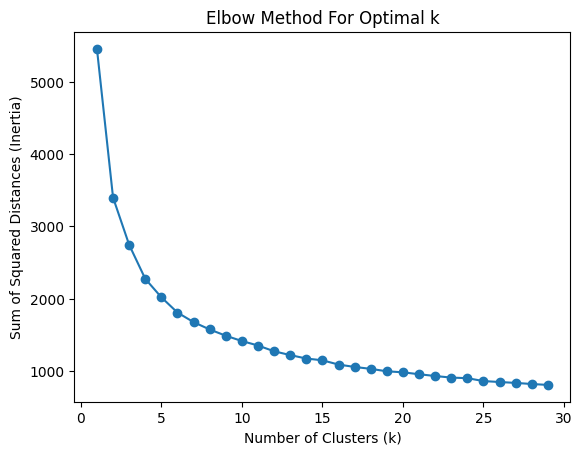

In [8]:
# Select features for clustering
features = combined_df[['player_height', 'player_weight','GP', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'PTS', 'EFF']]


# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Create a pipeline with KMeans
pipeline = make_pipeline(KMeans(random_state=42))


# Fit KMeans with different values of k
inertia = []
for k in range(1, 30):
    pipeline.set_params(kmeans__n_clusters=k)
    pipeline.fit(scaled_features)
    inertia.append(pipeline.named_steps['kmeans'].inertia_)
plt.plot(range(1, 30), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()



In [9]:
# the k value from the elbow method is 8 
k = 8 

In [10]:
# set the KMean using the K value
km = KMeans(n_clusters = k)
km.fit(features)
# use the KMean into the predict method

label = km.predict(features)
label

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 3, 1, 1,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 4, 1, 1, 1, 1, 4,
       4, 4, 4, 7, 4, 7, 4, 7, 7, 7, 7, 7, 7, 4, 4, 7, 7, 4, 7, 7, 7, 7,
       7, 4, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 2, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 7, 7,
       7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 7, 7, 7, 4, 2, 2, 2,
       2, 7, 2, 4, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 5, 2, 5, 2, 5,
       2, 5, 5, 2, 5, 2, 2, 5, 5, 2, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2,

In [11]:
from collections import Counter

In [12]:
#use couter from the predict Kmean
testing = Counter(label)

In [13]:
#create the cluster using the counter variable, testing
create = pd.DataFrame(label)
create = create.set_index(features.index)


In [49]:
# groupby the clusters 
answer = create.groupby(0)
answer
# printing 10 players per cluster in the dataframe
for cluster_id, group in answer:
    print(cluster_id)
    value = 0
    for t in group.index:
        if value == 5:
            break
        else:
            print(t)
            value+=1

0
Keon Johnson
Luka Garza
Amir Coffey
Taj Gibson
Evan Fournier
1
Anfernee Simons
Bennedict Mathurin
Jerami Grant
Bojan Bogdanovic
Jordan Clarkson
2
Collin Sexton
Lonnie Walker IV
Alec Burks
Cam Thomas
Damion Lee
3
Lauri Markkanen
Jalen Green
Jordan Poole
Mikal Bridges
Stephen Curry
4
Jonas Valanciunas
Alperen Sengun
Jarrett Allen
Nic Claxton
Rudy Gobert
5
Jaden Hardy
Gary Harris
Cam Reddish
John Wall
Will Barton
6
Jayson Tatum
Joel Embiid
Luka Doncic
Shai Gilgeous-Alexander
Giannis Antetokounmpo
7
Eric Gordon
LaMelo Ball
Austin Reaves
Patrick Williams
Dennis Schroder


In [48]:
features

,player_height,player_weight,GP,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,PTS,EFF
player_name,,,,,,,,,,,
Jayson Tatum,203.20,92.986360,74,727,1559,0.466,240,686,0.350,2225,2209
Joel Embiid,213.36,113.398000,66,728,1328,0.548,66,200,0.330,2183,2369
Luka Doncic,200.66,98.883056,66,719,1449,0.496,185,541,0.342,2138,2214
Shai Gilgeous-Alexander,198.12,82.100152,68,704,1381,0.510,58,168,0.345,2135,2073
Giannis Antetokounmpo,205.74,92.986360,63,707,1278,0.553,47,171,0.275,1959,2072
...,...,...,...,...,...,...,...,...,...,...,...
Justin Minaya,200.66,95.254320,4,7,23,0.304,3,12,0.250,17,22
Michael Carter-Williams,198.12,83.914520,4,6,14,0.429,1,3,0.333,17,16
Xavier Sneed,195.58,97.522280,4,5,10,0.500,3,6,0.500,17,20


In [27]:
# merge the clusters with the feature matrix 
final_df = pd.merge(create,features, on = 'player_name')
final_df

,0,player_height,player_weight,GP,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,PTS,EFF
player_name,,,,,,,,,,,,
Jayson Tatum,6,203.20,92.986360,74,727,1559,0.466,240,686,0.350,2225,2209
Joel Embiid,6,213.36,113.398000,66,728,1328,0.548,66,200,0.330,2183,2369
Luka Doncic,6,200.66,98.883056,66,719,1449,0.496,185,541,0.342,2138,2214
Shai Gilgeous-Alexander,6,198.12,82.100152,68,704,1381,0.510,58,168,0.345,2135,2073
Giannis Antetokounmpo,6,205.74,92.986360,63,707,1278,0.553,47,171,0.275,1959,2072
...,...,...,...,...,...,...,...,...,...,...,...,...
Justin Minaya,0,200.66,95.254320,4,7,23,0.304,3,12,0.250,17,22
Michael Carter-Williams,0,198.12,83.914520,4,6,14,0.429,1,3,0.333,17,16
Xavier Sneed,0,195.58,97.522280,4,5,10,0.500,3,6,0.500,17,20


Text(0, 0.5, 'GP')

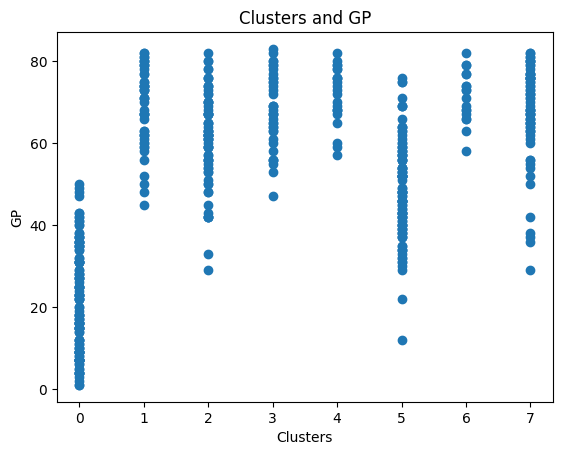

In [28]:
# scatterplot the clusters and GP
plt.scatter(final_df[0],final_df['GP'])
plt.title('Clusters and GP')
plt.xlabel('Clusters')
plt.ylabel('GP')


Text(0, 0.5, 'FGM')

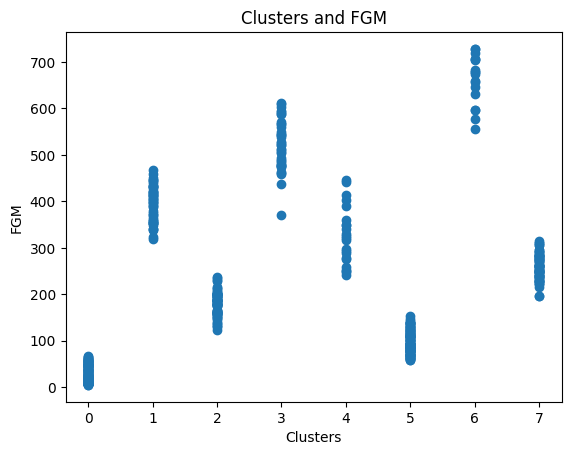

In [29]:
# scatterplot the clusters and FGM
plt.scatter(final_df[0],final_df['FGM'])
plt.title('Clusters and FGM')
plt.xlabel('Clusters')
plt.ylabel('FGM')

Text(0, 0.5, 'FGA')

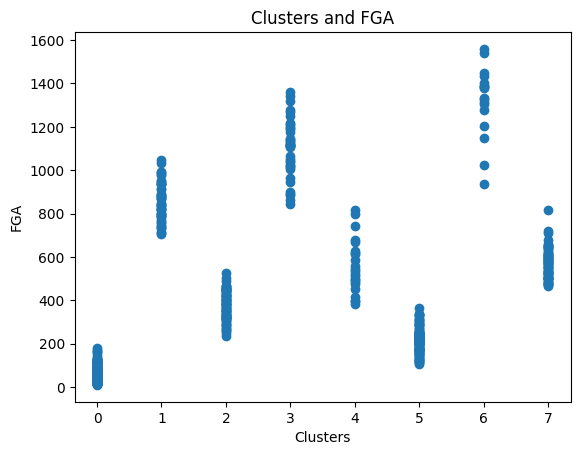

In [30]:
# scatterplot the clusters and FGA
plt.scatter(final_df[0],final_df['FGA'])
plt.title('Clusters and FGA')
plt.xlabel('Clusters')
plt.ylabel('FGA')

Text(0, 0.5, 'FG3_PCT')

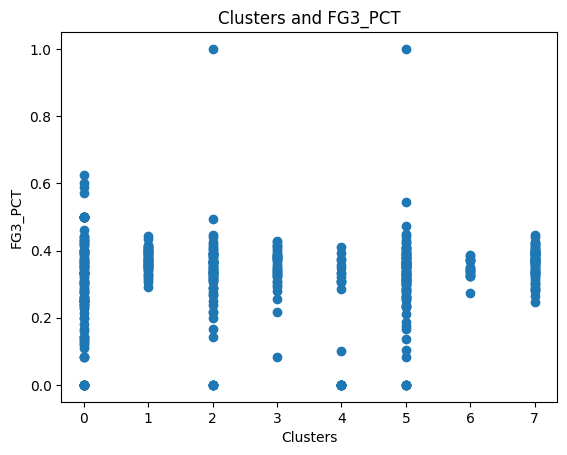

In [50]:
# scatterplot the clusters and FG3_PCT
plt.scatter(final_df[0],final_df['FG3_PCT'])
plt.title('Clusters and FG3_PCT')
plt.xlabel('Clusters')
plt.ylabel('FG3_PCT')

Text(0, 0.5, 'FG_PCT')

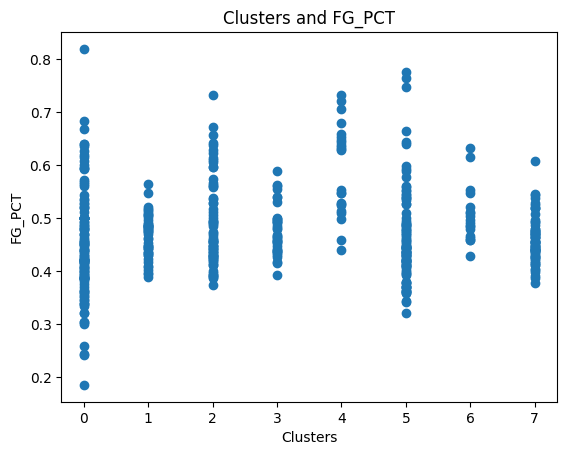

In [31]:
# scatterplot the clusters and FG_PCT
plt.scatter(final_df[0],final_df['FG_PCT'])
plt.title('Clusters and FG_PCT')
plt.xlabel('Clusters')
plt.ylabel('FG_PCT')

Text(0, 0.5, 'FG3M')

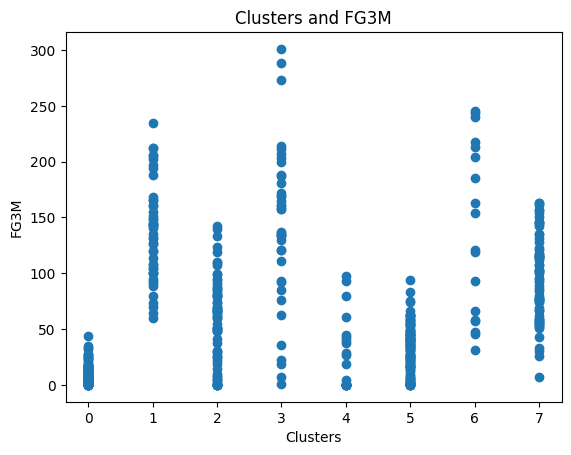

In [32]:
# scatterplot the clusters and FG3M
plt.scatter(final_df[0],final_df['FG3M'])
plt.title('Clusters and FG3M')
plt.xlabel('Clusters')
plt.ylabel('FG3M')

Text(0, 0.5, 'FG3A')

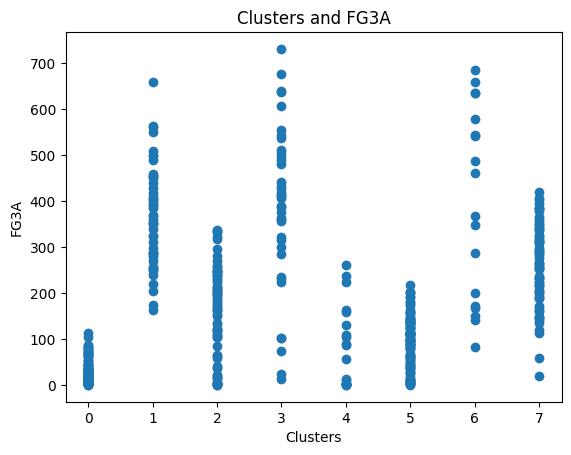

In [33]:
# scatterplot the clusters and FG3A
plt.scatter(final_df[0],final_df['FG3A'])
plt.title('Clusters and FG3A')
plt.xlabel('Clusters')
plt.ylabel('FG3A')

Text(0, 0.5, 'PTS')

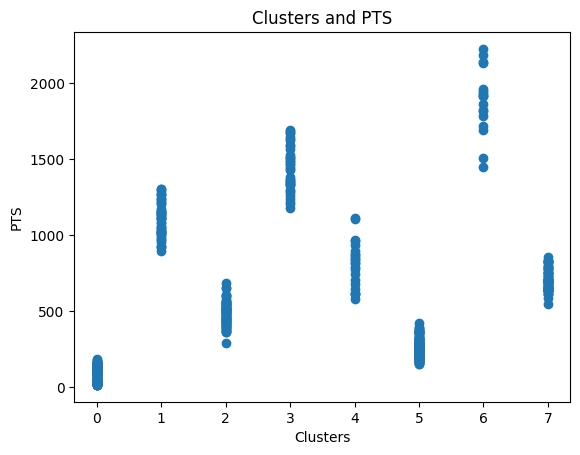

In [34]:
# scatterplot the clusters and PTS
plt.scatter(final_df[0],final_df['PTS'])
plt.title('Clusters and PTS')
plt.xlabel('Clusters')
plt.ylabel('PTS')

Text(0, 0.5, 'EFF')

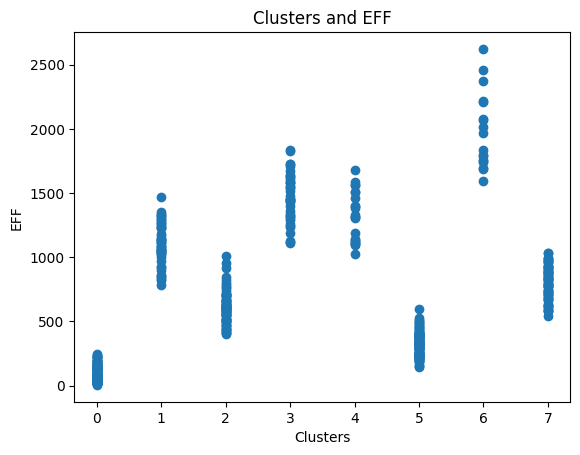

In [35]:
# scatterplot the clusters and EFF
plt.scatter(final_df[0],final_df['EFF'])
plt.title('Clusters and EFF')
plt.xlabel('Clusters')
plt.ylabel('EFF')